In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm

In [2]:
from mypackage import Model, LatLonGrid, SemiLag

## objective :

In this notebook, we define a wind field on $\mathbb{R}^3$ and perform semi-lagrangian and bilinear interpolation to advect a chemical tracer.

## defining the lat/lon grid :

In [27]:
n = 180
grid = LatLonGrid(n)

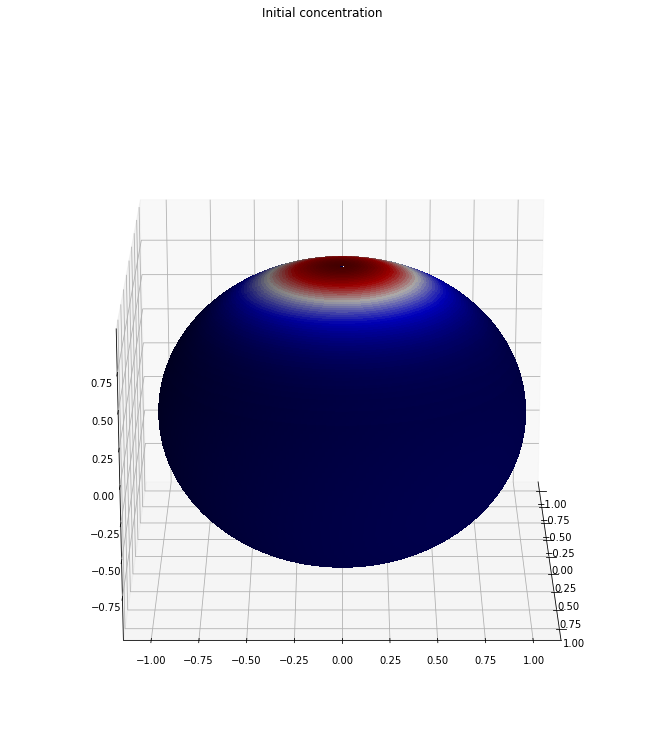

In [63]:
x,y,z = 0,0,1 ; lh = 0.5
distX = grid.X-x; distY = grid.Y-y; distZ = grid.Z-z
dist = np.linalg.norm(np.array([distX,distY,distZ]),ord=2,axis=0)  
x0 = np.exp(- dist **2 / lh**2)


grid.sphere_plot(x0,title='Initial concentration',elev=20,azim=0,figsize=(12,12));

## defining the Spherical advection class :

# Rotation around the $z$-axis

In the $(\theta, \phi)$ system of coordinates, the wind field correponding to a constant rotation along the $z$-axis writes $u=(u_\theta, u_\phi) = (0, 1)$, where 1 is the angular velocity.

In [38]:
wind_xyz = grid.e_phi
### normalizing the wind field :
wind_xyz = wind_xyz/np.linalg.norm(wind_xyz,axis=0).max()
max_wind_speed = 50 #kmh
D = 6370 #earth radius in km
wind_xyz = wind_xyz/D * max_wind_speed

In [30]:
t_end = 2*np.pi*D / max_wind_speed # time for one revolution.
dt = .25  #time step in hour

sl = SemiLag(n,wind_xyz, dt=dt)

In [31]:
forecast = sl.forecast(x0, t_end, time_saving_interval=0.5)

100%|██████████| 3202/3202 [00:31<00:00, 101.54it/s]


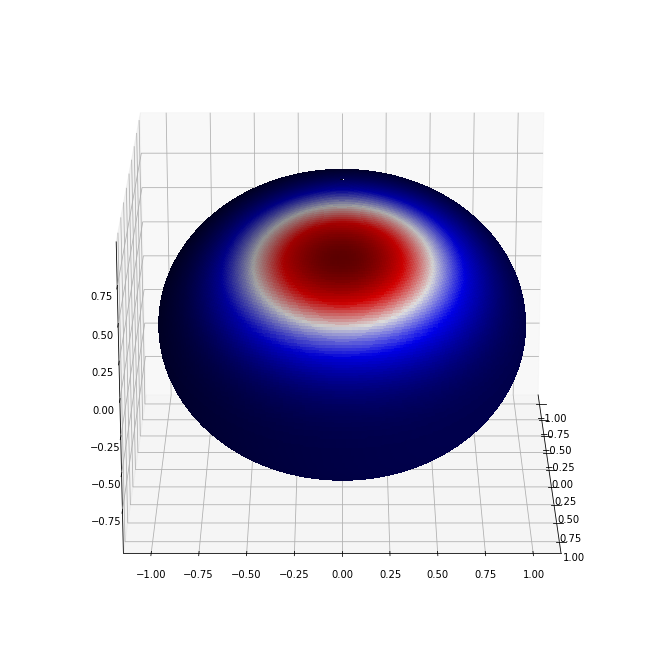

In [39]:
sl.grid.sphere_plot(forecast[t_end], elev=20,azim=0,title=None,figsize=(12,12));

We observe some diffusion along the latitude lines : this is due to the bilinear interpolation method.

## Mass variation during experiment :

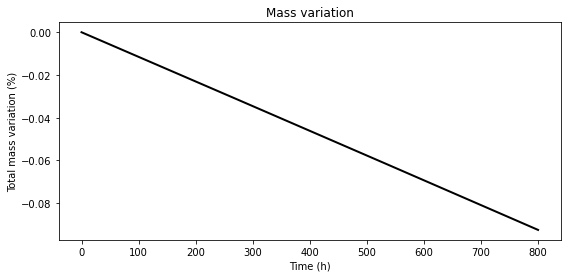

In [40]:
traj = np.array(list(forecast.values()))
mass = traj.sum(axis=(1,2))
mass_variation = (mass/mass[0] - 1)*100
plt.figure(figsize=(9,4))
plt.plot(list(forecast.keys()), mass_variation,c='k',linewidth = 2 )
plt.title("Mass variation");
plt.ylabel("Total mass variation (%)")
plt.xlabel("Time (h)");

# Half-rotation along the $x$-axis : crossing the poles

In [41]:
def wind(x,y,z):
    phi = np.arctan2(y,x)
    theta = np.arcsin(z/(x**2+y**2+z**2)**.5)
    
    wind = np.array([
        -np.cos(grid.xtheta)*np.sin(grid.xphi),
        np.cos(grid.xtheta)*np.cos(grid.xphi),
        grid.xtheta * 0
    ])    
    return wind

wind2 = wind(grid.Z,-grid.X,grid.Y)
wind2 = np.array([wind2[1],wind2[2],-wind2[0]])

wind2 = wind2/np.linalg.norm(wind2,axis=0).max()
max_wind_speed = 50 #kmh
D = 6370 #earth radius in km
wind2 = wind2/D * max_wind_speed

### wind intensity plot :

In [42]:
wind2 = np.array([wind_xyz[2],-wind_xyz[0],wind_xyz[1]])

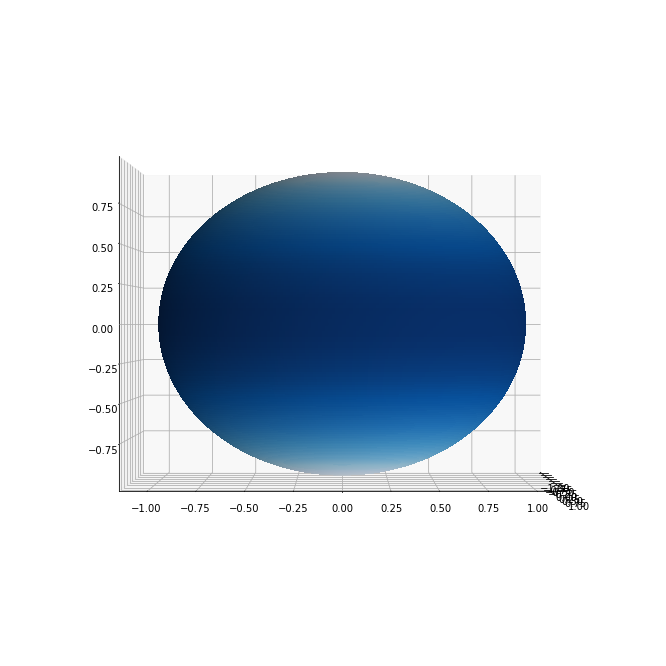

In [43]:
grid.sphere_plot(np.linalg.norm(wind2,axis=0),
            cmap=cm.Blues,
            elev=0,azim=0,
            title=None,
            figsize=(12,12));

In [44]:
t_end = 2*np.pi*D / max_wind_speed # time for one revolution.
dt = .25  #time step in hour

sl = SemiLag(n,wind2, dt=dt)

In [45]:
forecast = sl.forecast(x0, t_end, time_saving_interval=0.5)

100%|██████████| 3202/3202 [00:32<00:00, 97.56it/s] 


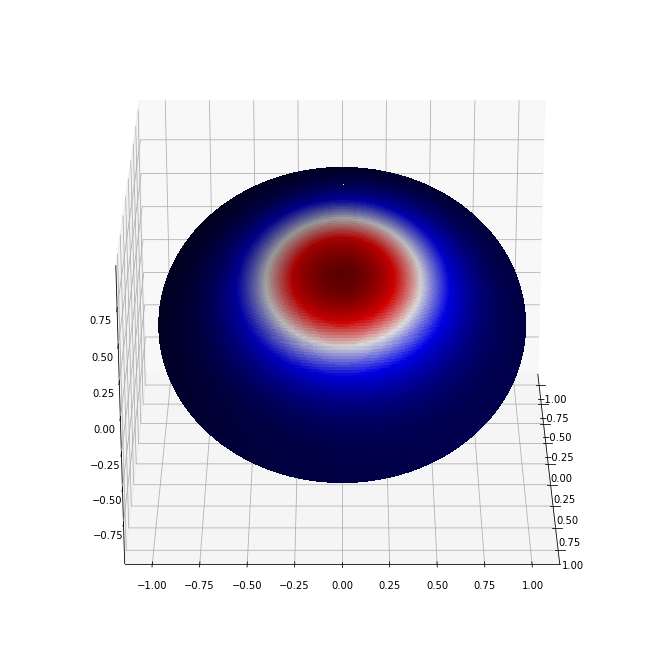

In [46]:
grid.sphere_plot(list(forecast.values())[0],
            elev=25,azim=0,
            title=None,
            figsize=(12,12));

No deformation is visible after half a rotation over the pole.

## Mass variation during experiment :

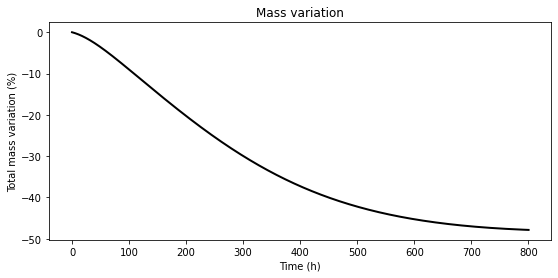

In [47]:
traj = np.array(list(forecast.values()))
mass = traj.sum(axis=(1,2))
mass_variation = (mass/mass[0] - 1)*100
plt.figure(figsize=(9,4))
plt.plot(list(forecast.keys()),mass_variation,c='k',linewidth = 2 )
plt.title("Mass variation");
plt.ylabel("Total mass variation (%)")
plt.xlabel("Time (h)");

In [48]:
from mypackage.random import *

In [64]:
wind = grid.isotropic_grf(3,alpha=0.85)

wind -= (wind * grid.e_r).sum(axis=0) * grid.e_r ## removing the normal component of the wind

wind = wind/np.linalg.norm(wind,axis=0).max()
max_wind_speed = 130 #kmh
D = 6370 #earth radius in km
wind = wind/D * max_wind_speed

/home/perrota/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### wind intensity plot

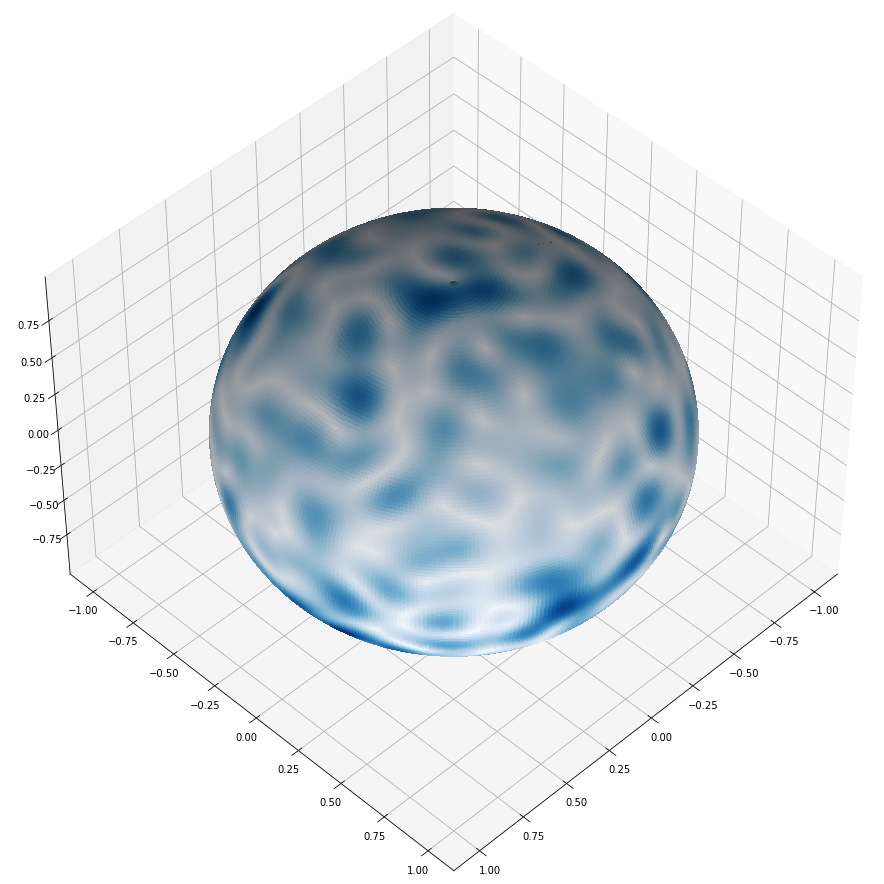

In [65]:
grid.sphere_plot(np.linalg.norm(wind,axis=0),
            cmap=cm.Blues,
            elev=45,azim=45,
            title=None,
            figsize=(16,16));

### forecasting an initial random field of concentration

In [66]:
error = grid.isotropic_grf(1)[0]

x02 = x0*(1 + error/10)
t_end = 24 
dt = .25      #time step in hour
sl = SemiLag(n,wind, dt=dt)

In [67]:
forecast = sl.forecast(x02, t_end, time_saving_interval=0.5)

100%|██████████| 96/96 [00:01<00:00, 84.04it/s]


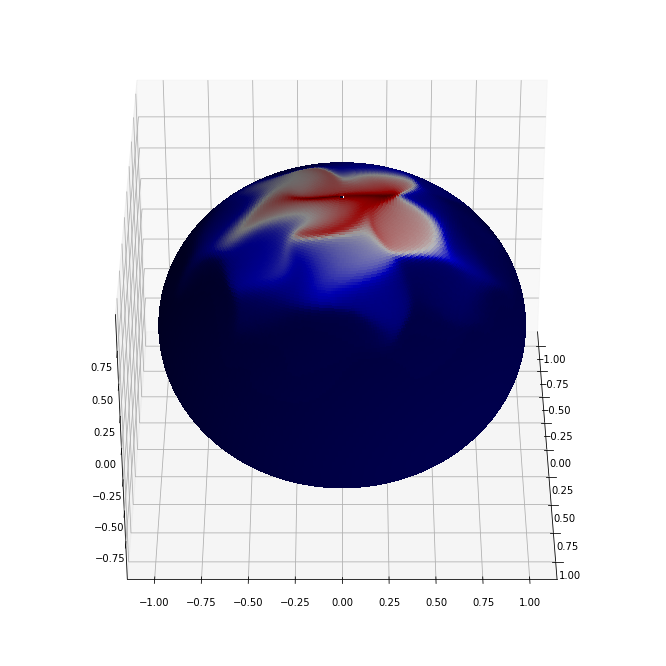

In [68]:
grid.sphere_plot(list(forecast.values())[-1],
            elev=35,azim=0,
            title=None,
            figsize=(12,12));

## Mass variation during experiment :

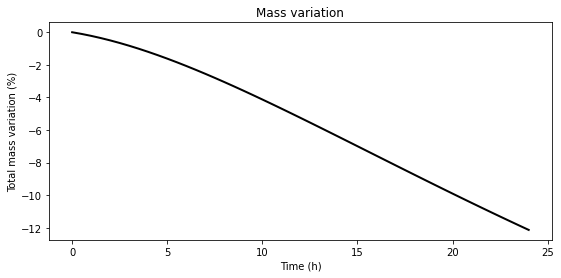

In [69]:
traj = np.array(list(forecast.values()))
mass = traj.sum(axis=(1,2))
mass_variation = (mass/mass[0] - 1)*100
plt.figure(figsize=(9,4))
plt.plot(list(forecast.keys()),mass_variation,c='k',linewidth = 2 )
plt.title("Mass variation");
plt.ylabel("Total mass variation (%)")
plt.xlabel("Time (h)");

In [24]:
def make_plot_sphere(INDEX_TIME,cmin,cmax, ds=1,cmap=cm.RdBu,title=None):
    fig = plot_sphere(X,Y,Z,SL[SL.saved_times[INDEX_TIME]],
            cmap=cmap,
            elev=45,azim=45,
            ds =ds,
            title=title,
            cmin=cmin,cmax=cmax,
            figsize=(22,22))
    return  fig

In [25]:
titles = ['Advection of a tracer by a random isotropic wind, ' + f'$t={T:.2f}$h' for T in SL.saved_times]

saving_dir = '../../../Pictures/plots/'
img_name='SphereAdvection'

cmin,cmax = np.min(list(SL.trajectory.values())), np.max(list(SL.trajectory.values()))
ploting_args= (
    cmin,cmax,
    1,
    cm.BuPu,)
save_plots(saving_dir, img_name, make_plot_sphere, range(len(SL.saved_times)),titles, ploting_args)


make_gif(saving_dir, 'animated_plots/',img_name)

NameError: name 'SL' is not defined

<img src="animated_plots/SphereAdvection.gif">

### making a video file :

In [ ]:
import cv2
import glob

img_array = []
for filename in glob.glob(saving_dir + '*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


    
out = cv2.VideoWriter( 'animated_plots/'+img_name+'.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 28, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [ ]:
def BilinearSphericalInterpolation(self, backtrack_points, state):
    THETAd, PHId = backtrack_points
    
    south_pole_mean = state[:,[0]]*0 + state[:,0].mean()
    north_pole_mean = state[:,[-1]]*0 + state[:,-1].mean()

    poles_extended_state = np.hstack([south_pole_mean, state, north_pole_mean])
    
    
    # bilinear interpolation on "rectangles" defined by the lat/lon grid.
    PHI_ = PHId.astype(int)
    PHIp_ = (PHId+1).astype(int) % self.m  # 
    
    THETA_ = THETAd.astype(int)
    THETAp_ = (THETAd+1).astype(int)
    
    interpolation = (1-THETAd%1)         *(  (1-PHId%1) * poles_extended_state[PHI_      , THETA_        ]
                                           + (PHId % 1) * poles_extended_state[PHIp_ , THETA_        ] ) \
                +  (THETAd % 1)          *(  (1-PHId%1) * poles_extended_state[PHI_      , THETAp_  ]
                                           + (PHId % 1) * poles_extended_state[PHIp_ , THETAp_  ] )
    
    return interpolation